# FSL and Dipy

In [1]:
from os.path import join as pjoin
import numpy as np

from dipy.io.image import load_nifti, save_nifti
import matplotlib.pyplot as plt
from dipy.core.histeq import histeq

# Brain extraction


In [28]:
!/tmp/fsl_ bet "../../../data/mri_data/sub-08_anat_sub-08_T1w" "../../../data/mri_data/sub-08_anat_sub-08_T1w-nii_brain" -f 0.2 -g 0 -m

In [29]:
ls ../../../data/mri_data

mywarpedT1.nii.gz
nonlintransf.mat.nii.gz
se_1.5t_binary_mask.nii.gz
se_1.5t_mask.nii.gz
structural_brain_mask.nii.gz
structural_brain.nii.gz
structural.nii.gz
sub-01_ses-test_anat_sub-01_ses-test_T1w.nii.gz
sub-01_ses-test_func_sub-01_ses-test_task-fingerfootlips_bold.nii.gz
sub-08_anat_sub-08_T1w-nii_brainFI_mask.nii.gz
sub-08_anat_sub-08_T1w-nii_brainFI.nii.gz
sub-08_anat_sub-08_T1w-nii_brainFI_to_MNI152.mat
sub-08_anat_sub-08_T1w-nii_brainFI_to_MNI152.nii.gz
sub-08_anat_sub-08_T1w-nii_brain_mask.nii.gz
sub-08_anat_sub-08_T1w-nii_brain.nii.gz
sub-08_anat_sub-08_T1w.nii.gz
sub-08_anat_sub-08_T1w_to_MNI152_T1_2mm.log


In [30]:
t1w, affine = load_nifti("../../../data/mri_data/sub-08_anat_sub-08_T1w.nii.gz")
t1w = np.squeeze(t1w)

brain_mask, affine = load_nifti("../../../data/mri_data/sub-08_anat_sub-08_T1w-nii_brain_mask.nii.gz")
brain_mask = np.squeeze(brain_mask)

brain, affine = load_nifti("../../../data/mri_data/sub-08_anat_sub-08_T1w-nii_brain.nii.gz")
brain = np.squeeze(brain)

In [31]:
print("T1w:", t1w.shape)
print("extracted brain:", brain.shape)
print("brain mask:", brain_mask.shape)

T1w: (176, 256, 256)
extracted brain: (176, 256, 256)
brain mask: (176, 256, 256)


Text(0.5, 1.0, 'mask')

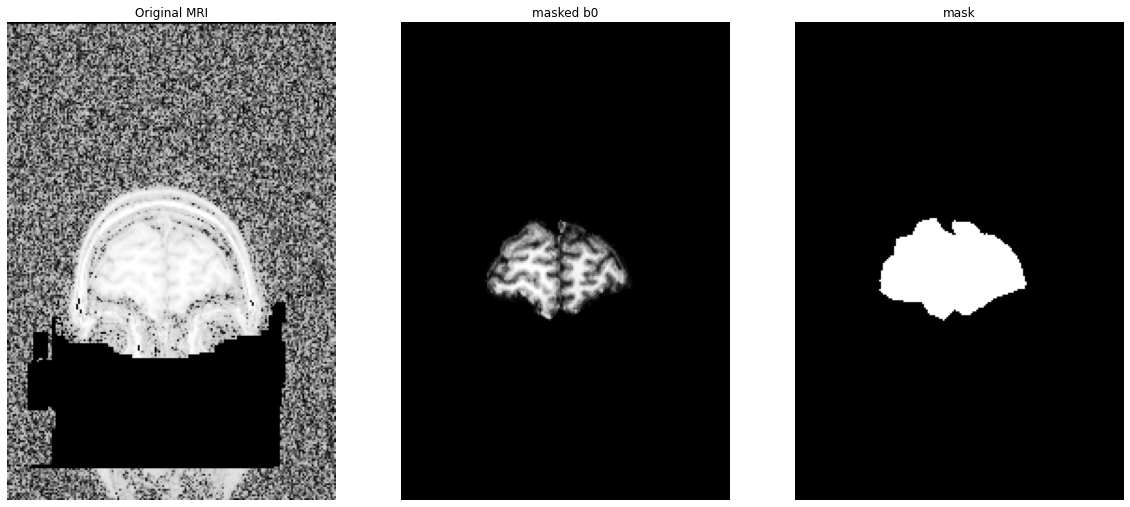

In [32]:
data=t1w

sli = data.shape[1] // 2

sli=200

plt.figure('Brain segmentation',figsize=(20,10))
plt.subplot(1, 3, 1).set_axis_off()
plt.imshow(histeq(data[:, sli, :].astype('float')).T,
           cmap='gray', origin='lower')
plt.title("Original MRI")

plt.subplot(1, 3, 2).set_axis_off()
plt.imshow(histeq(brain[:, sli, :].astype('float')).T,
           cmap='gray', origin='lower')
plt.title("masked b0")

plt.subplot(1, 3, 3).set_axis_off()
plt.imshow(histeq(brain_mask[:, sli, :].astype('float')).T,
           cmap='gray', origin='lower')
plt.title("mask")

In [33]:
sli

200

Text(0.5, 1.0, 'mask')

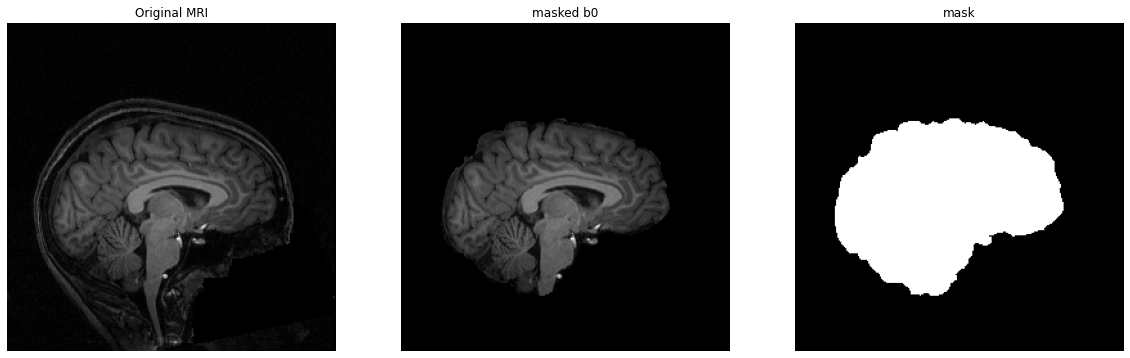

In [34]:
data=t1w

sli = data.shape[0] // 2
plt.figure('Brain segmentation',figsize=(20,10))
plt.subplot(1, 3, 1).set_axis_off()
plt.imshow((data[sli, :, :].astype('float')).T,
           cmap='gray', origin='lower')
plt.title("Original MRI")

plt.subplot(1, 3, 2).set_axis_off()
plt.imshow((brain[sli, :, :].astype('float')).T,
           cmap='gray', origin='lower')
plt.title("masked b0")

plt.subplot(1, 3, 3).set_axis_off()
plt.imshow((brain_mask[sli, :, :].astype('float')).T,
           cmap='gray', origin='lower')
plt.title("mask")

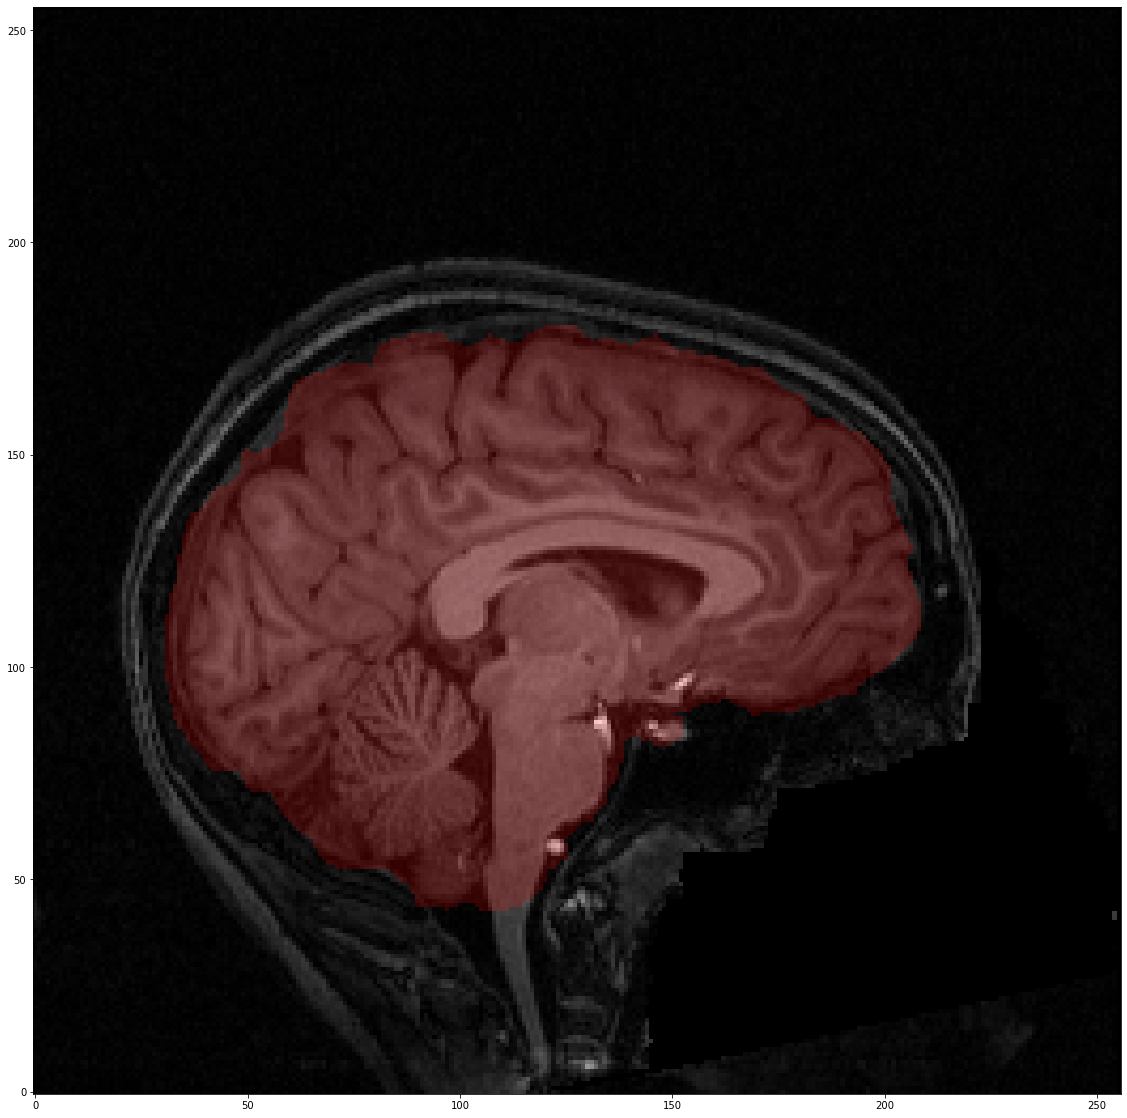

In [35]:
sli = data.shape[0] // 2
plt.figure('Brain segmentation',figsize=(20,20))
plt.imshow((data[sli, :, :].astype('float')).T,
           cmap='gray', origin='lower')

brain_mask = brain_mask.astype('float')
brain_mask[brain_mask == 0] = 'nan' # or use np.nan

plt.imshow((brain_mask[sli, :, :].astype('float')).T,
           cmap='autumn', origin='lower',alpha=0.2)

# Image registration and normalization

Text(0.5, 1.0, 'Slice=40')

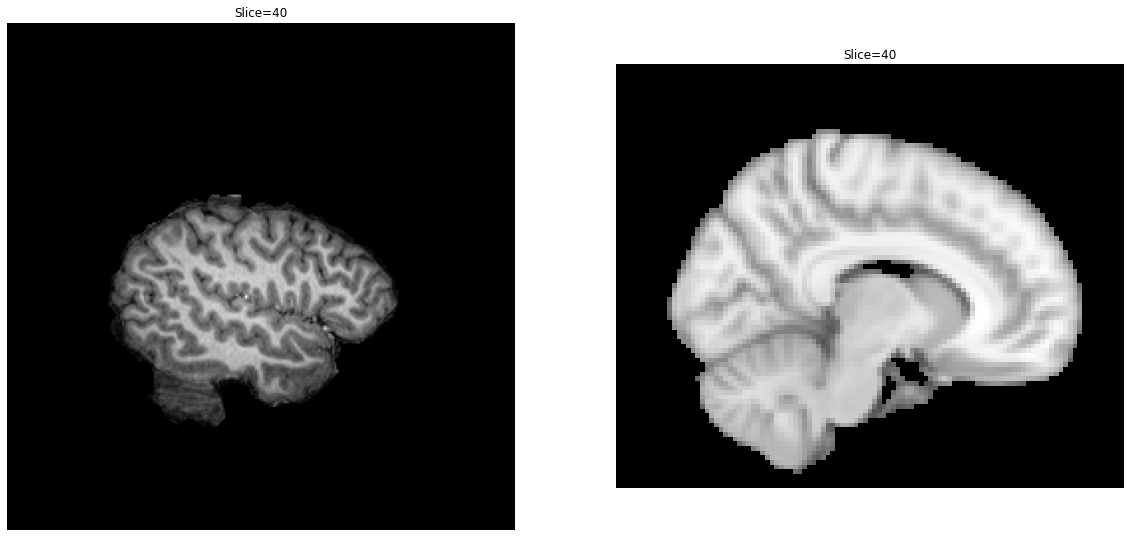

In [19]:
t1w_brain, affine = load_nifti("../../../data/mri_data/sub-08_anat_sub-08_T1w-nii_brainFI.nii.gz")
t1w_brain = np.squeeze(t1w_brain)

mni, affine = load_nifti("/tmp/fsl/data/standard/MNI152_T1_2mm_brain.nii.gz")
mni = np.squeeze(mni)


sli = t1w_brain.shape[0] // 2
sli = 40
plt.figure('Brain segmentation',figsize=(20,20))
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow((t1w_brain[sli, :, :].astype('float')).T,
           cmap='gray', origin='lower')
plt.title("Slice="+str(sli))

#sli = mni.shape[0] // 2
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow((mni[sli, :, :].astype('float')).T,
           cmap='gray', origin='lower')
plt.title("Slice="+str(sli))

In [20]:
sli

40

In [21]:
!/tmp/fsl_ flirt -in "../../../data/mri_data/sub-08_anat_sub-08_T1w-nii_brainFI.nii.gz" \
-ref "/tmp/fsl/data/standard/MNI152_T1_2mm_brain" \
-out "../../../data/mri_data/sub-08_anat_sub-08_T1w-nii_brainFI_to_MNI152.nii.gz" \
-omat "../../../data/mri_data/sub-08_anat_sub-08_T1w-nii_brainFI_to_MNI152.mat" \
-bins 256 -cost corratio -searchrx -90 90 -searchry -90 90 \
-searchrz -90 90 -dof 12  -interp trilinear

Text(0.5, 1.0, 'Slice=45')

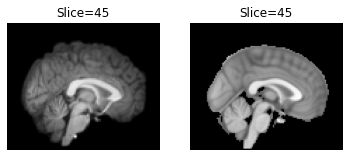

In [22]:
t1w_brain, affine = load_nifti("../../../data/mri_data/sub-08_anat_sub-08_T1w-nii_brainFI_to_MNI152.nii.gz")
t1w_brain = np.squeeze(t1w_brain)

mni, affine = load_nifti("/tmp/fsl/data/standard/MNI152_T1_2mm_brain.nii.gz")
mni = np.squeeze(mni)


sli = t1w_brain.shape[0] // 2

plt.figure('Brain segmentation')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow((t1w_brain[sli, :, :].astype('float')).T,
           cmap='gray', origin='lower')
plt.title("Slice="+str(sli))

plt.subplot(1, 2, 2).set_axis_off()
plt.imshow((mni[sli, :, :].astype('float')).T,
           cmap='gray', origin='lower')
plt.title("Slice="+str(sli))

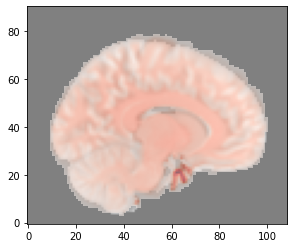

In [23]:
#sli = t1w_brain.shape[0] // 2

sli=50

plt.figure('Brain registration')

plt.imshow((mni[sli, :, :].astype('float')).T,
           cmap='gray', origin='lower', alpha=0.5)

t1w_brain = t1w_brain.astype('float')
t1w_brain[t1w_brain == 0] = 'nan' # or use np.nan

plt.imshow((t1w_brain[sli, :, :].astype('float')).T,
           cmap='Reds', origin='lower', alpha=0.5)

## Nonlinear registration


In [24]:
##
!/tmp/fsl_ fnirt --in="../../../data/mri_data/sub-08_anat_sub-08_T1w.nii.gz" \
--aff="../../../data/mri_data/sub-08_anat_sub-08_T1w-nii_brainFI_to_MNI152.mat" \
--cout="../../../data/mri_data/nonlintransf.mat" \
--config=T1_2_MNI152_2mm 
##

In [25]:
##
!/tmp/fsl_ applywarp  \
--ref=/tmp/fsl/data/standard/MNI152_T1_2mm \
--in="../../../data/mri_data/sub-08_anat_sub-08_T1w.nii.gz"  \
--warp="../../../data/mri_data/nonlintransf.mat"  \
--out="../../../data/mri_data/mywarpedT1.nii.gz"
##

Text(0.5, 1.0, 'Nonlinear registration')

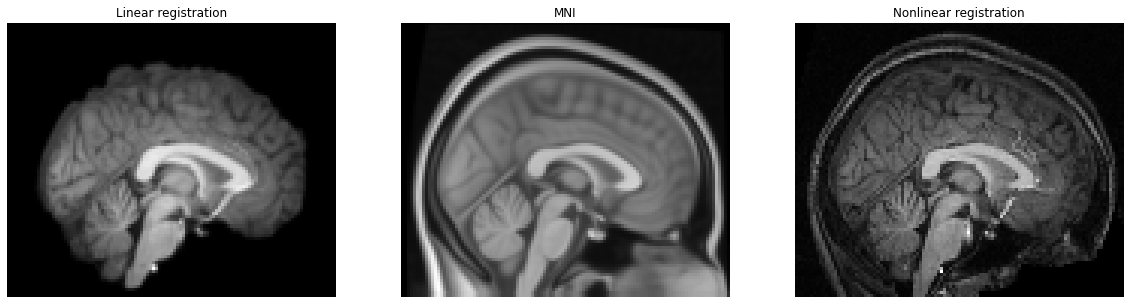

In [26]:
t1w_brain, affine = load_nifti("../../../data/mri_data/sub-08_anat_sub-08_T1w-nii_brainFI_to_MNI152.nii.gz")
t1w_brain = np.squeeze(t1w_brain)

mni, affine = load_nifti("/tmp/fsl/data/standard/MNI152_T1_2mm.nii.gz")
mni = np.squeeze(mni)

t1w_warp, affine = load_nifti("../../../data/mri_data/mywarpedT1.nii.gz")
t1w_warp = np.squeeze(t1w_warp)

sli = t1w_brain.shape[0] // 2

plt.figure('Brain registration',figsize=(20,10))
plt.subplot(1, 3, 1).set_axis_off()
plt.imshow((t1w_brain[sli, :, :].astype('float')).T,
           cmap='gray', origin='lower')
plt.title("Linear registration")

sli = mni.shape[0] // 2

plt.subplot(1, 3, 2).set_axis_off()
plt.imshow((mni[sli, :, :].astype('float')).T,
           cmap='gray', origin='lower')
plt.title("MNI")

plt.subplot(1, 3, 3).set_axis_off()
plt.imshow((t1w_warp[sli, :, :].astype('float')).T,
           cmap='gray', origin='lower')
plt.title("Nonlinear registration")

Text(0.5, 1.0, 'MNI vs. linear registration')

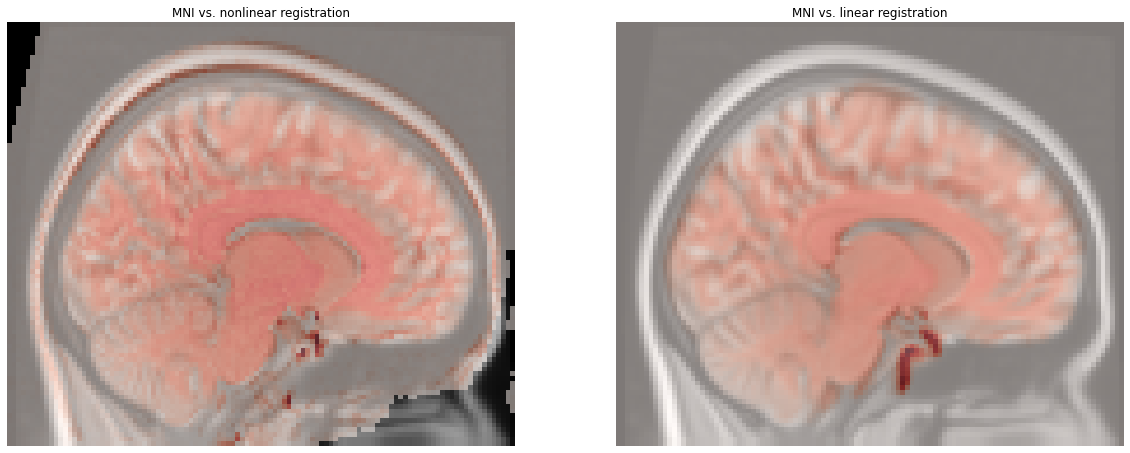

In [27]:
#sli = t1w_brain.shape[0] // 2

sli=40

plt.figure('Brain registration',figsize=(20,20))

plt.subplot(1, 2, 1).set_axis_off()
plt.imshow((mni[sli, :, :].astype('float')).T,
           cmap='gray', origin='lower', alpha=1.0)

t1w_warp = t1w_warp.astype('float')
t1w_warp[t1w_warp == 0] = 'nan' # or use np.nan

plt.imshow((t1w_warp[sli, :, :].astype('float')).T,
           cmap='Reds', origin='lower',alpha=0.5)

plt.title("MNI vs. nonlinear registration")

plt.subplot(1, 2, 2).set_axis_off()

plt.imshow((mni[sli, :, :].astype('float')).T,
           cmap='gray', origin='lower', alpha=1.0)

plt.imshow((t1w_brain[sli, :, :].astype('float')).T,
           cmap='Reds', origin='lower',alpha=0.5)


plt.title("MNI vs. linear registration")